__`NOTEBOOK START`__

--------

# <center>__I - EXPLORATORY DATA ANALYSIS__</center>

--------

#### __SECTION PLAN__ 🎯

1. DATA DISCOVERY
2. DATA CLEANNING
3. VISUALIZING OUR FEATURES

---------

--------
### __1. DATA DISCOVERY__
--------

In [662]:
print('>>>> 📚 Importing librairies...')
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.options.mode.chained_assignment = None

import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import linear_model
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
print('>>>> ✅ ...Done')

>>>> 📚 Importing librairies...


>>>> ✅ ...Done


In [663]:
print('>>>> 📊 Loading dataset...')
df = pd.read_csv('Walmart_Store_sales.csv')
print('>>>> ✅ ...Done')

>>>> 📊 Loading dataset...
>>>> ✅ ...Done


In [664]:
print()
print('Display of dataset: ')
print()
display(df.head(11))

print()
print('Main statistics: ')
print()
df_stats = df.describe().apply(lambda s: s.apply('{0:.2f}'.format))
display(df_stats)

print()
print ('Missing values:')
print()
# Here I created a function that will return the percentage and the quantity of missing values in our DF
def missing_values():
    
    missing = (pd.DataFrame(df.isnull().sum()/df.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())


Display of dataset: 



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833



Main statistics: 



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.00,136.00,138.00,132.00,136.00,138.00,135.00
mean,9.87,1249535.83,0.08,61.40,3.32,179.90,7.60
std,6.23,647463.04,0.27,18.38,0.48,40.27,1.58
min,1.00,268929.03,0.00,18.79,2.51,126.11,5.14
25%,4.00,605075.72,0.00,45.59,2.85,131.97,6.60
50%,9.00,1261423.86,0.00,62.98,3.45,197.91,7.47
75%,15.75,1806386.20,0.00,76.34,3.71,214.93,8.15
max,20.00,2771397.17,1.00,91.65,4.19,226.97,14.31



Missing values:



,Percentage of Missing Values,Number of Missing Values
Date,12.00,18
Temperature,12.00,18
Unemployment,10.00,15
Weekly_Sales,9.33,14
Fuel_Price,9.33,14
Holiday_Flag,8.00,12
CPI,8.00,12
Store,0.00,0


In [665]:
#These are the columns we are dealing with in this df
print(df.columns.tolist())

['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


Features explained: 

* Store : store's number
* Date : the week of sales
* Weekly_Sales : sales for the given store
* Holiday_Flag : whether the week is a special holiday week 1 - Holiday week 0 – Non-holiday week
* Temperature : temperature on sales day
* Fuel_Price : fuel cost
* CPI : consumer price index
* Unemployment : unemployment rate

In [666]:
rows = df.shape[0]
columns = df.shape[1]
number_of_elements = df.size

print()
print ('Our data frame shape:')
print (f' - Number of columns/features: {columns}')
print (f' - Number of rows: {rows}')
print (f' - Number of elements: {number_of_elements}')


Our data frame shape:
 - Number of columns/features: 8
 - Number of rows: 150
 - Number of elements: 1200


In [667]:
# we can also check each columns types with df.info(verbose=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


--------
### __2. DATA CLEANNING__
--------

In [668]:
df.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

__OBSERVATIONS:__<br>
* We have 3 columns that should not be the type they are: 'Store', 'Holiday_Flag' and 'Date'.

* The first two are float types when they should be categorical: 'Store' numbers are a way to distingush each store. As for 'Holiday_Flag', it's a bunch of 1's and 0's to tell us if we are in a special holiday week or not.

* For the column 'Date', it should be converted into a datetime type.

* Modifying those columns types is our next step.

In [669]:
df['Store'] = pd.Categorical(df.Store)
df['Holiday_Flag'] = pd.Categorical(df.Holiday_Flag)

In [670]:
df.dtypes

Store           category
Date              object
Weekly_Sales     float64
Holiday_Flag    category
Temperature      float64
Fuel_Price       float64
CPI              float64
Unemployment     float64
dtype: object

In [671]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Then I create a list of columns I want to add to the DF
columns = ['Year', 'Month', 'Day']

"""df['Day_Name'] = df['Date'].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name()"""

datetime_index = pd.DatetimeIndex(df['Date'])

# Finally, we loop to iterate through the list of columns to use the getattr() function 
# in order to retrieve the attribute of the datetime_index object corresponding to the current value of column
for column in columns:
    df[column] = getattr(datetime_index, column.lower())

In [672]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0


In [673]:
df.shape

(150, 11)

In [674]:
df = df.dropna(subset=['Weekly_Sales', 'Date'])

In [675]:
df['Date'].max()

Timestamp('2012-10-19 00:00:00')

In [676]:
df['Date'].min()

Timestamp('2010-02-05 00:00:00')

In [677]:
# We don't need this column anymore so we're dropping it.
df = df.drop(columns=['Date'])

In [678]:
df.shape

(118, 10)

In [679]:
def missing_values():
    
    missing = (pd.DataFrame(df.isnull().sum()/df.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())
print(f'Percentage of missing values in our DF: {((df.isnull().sum().sum()/df.size)*100).round(2)}%')
print(f'Total number of missing values: {df.isnull().sum().sum()}')
print(f'Total number of elements: {df.size}')
rows = df.shape[0]
print(f'Number of rows: {rows}') 

,Percentage of Missing Values,Number of Missing Values
Temperature,9.32,11
Fuel_Price,9.32,11
Unemployment,9.32,11
Holiday_Flag,7.63,9
CPI,7.63,9
Store,0.00,0
Weekly_Sales,0.00,0
Year,0.00,0
Month,0.00,0
Day,0.00,0


Percentage of missing values in our DF: 4.32%
Total number of missing values: 51
Total number of elements: 1180
Number of rows: 118


### __DROPPING OUTLINERS__


In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$.<br><br>
This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 

In [680]:
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Calculating the mean and standard deviation of the list above
mean = df[columns].mean()
std = df[columns].std()

for index, row in df[columns].iterrows():
    
    # Checking if any of the values in the row are outside the range
    if any(row < mean - 3*std) or any(row > mean + 3*std):
        # Dropping the row if any values are outside the range
        df.drop(index, inplace=True)

In [681]:
def missing_values():
    
    missing = (pd.DataFrame(df.isnull().sum()/df.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())
print(f'Percentage of missing values in our DF: {((df.isnull().sum().sum()/df.size)*100).round(2)}%')
print(f'Total number of missing values: {df.isnull().sum().sum()}')
print(f'Total number of elements: {df.size}')
rows = df.shape[0]
print(f'Number of rows: {rows}') 


,Percentage of Missing Values,Number of Missing Values
Fuel_Price,9.73,11
Unemployment,9.73,11
Temperature,8.85,10
Holiday_Flag,7.96,9
CPI,7.96,9
Store,0.00,0
Weekly_Sales,0.00,0
Year,0.00,0
Month,0.00,0
Day,0.00,0


Percentage of missing values in our DF: 4.42%
Total number of missing values: 50
Total number of elements: 1130
Number of rows: 113


__OBSERVATIONS:__<br>
* 5 rows from numeric features did not fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$ and have been dropped from our DF. 

* As a consequence, we went from 118 rows to 113 rows.

* A total of 55 values have been dropped as we went from a df.size of 1298 to 1243 elements.

<Axes: title={'center': 'DF HEATMAP'}>

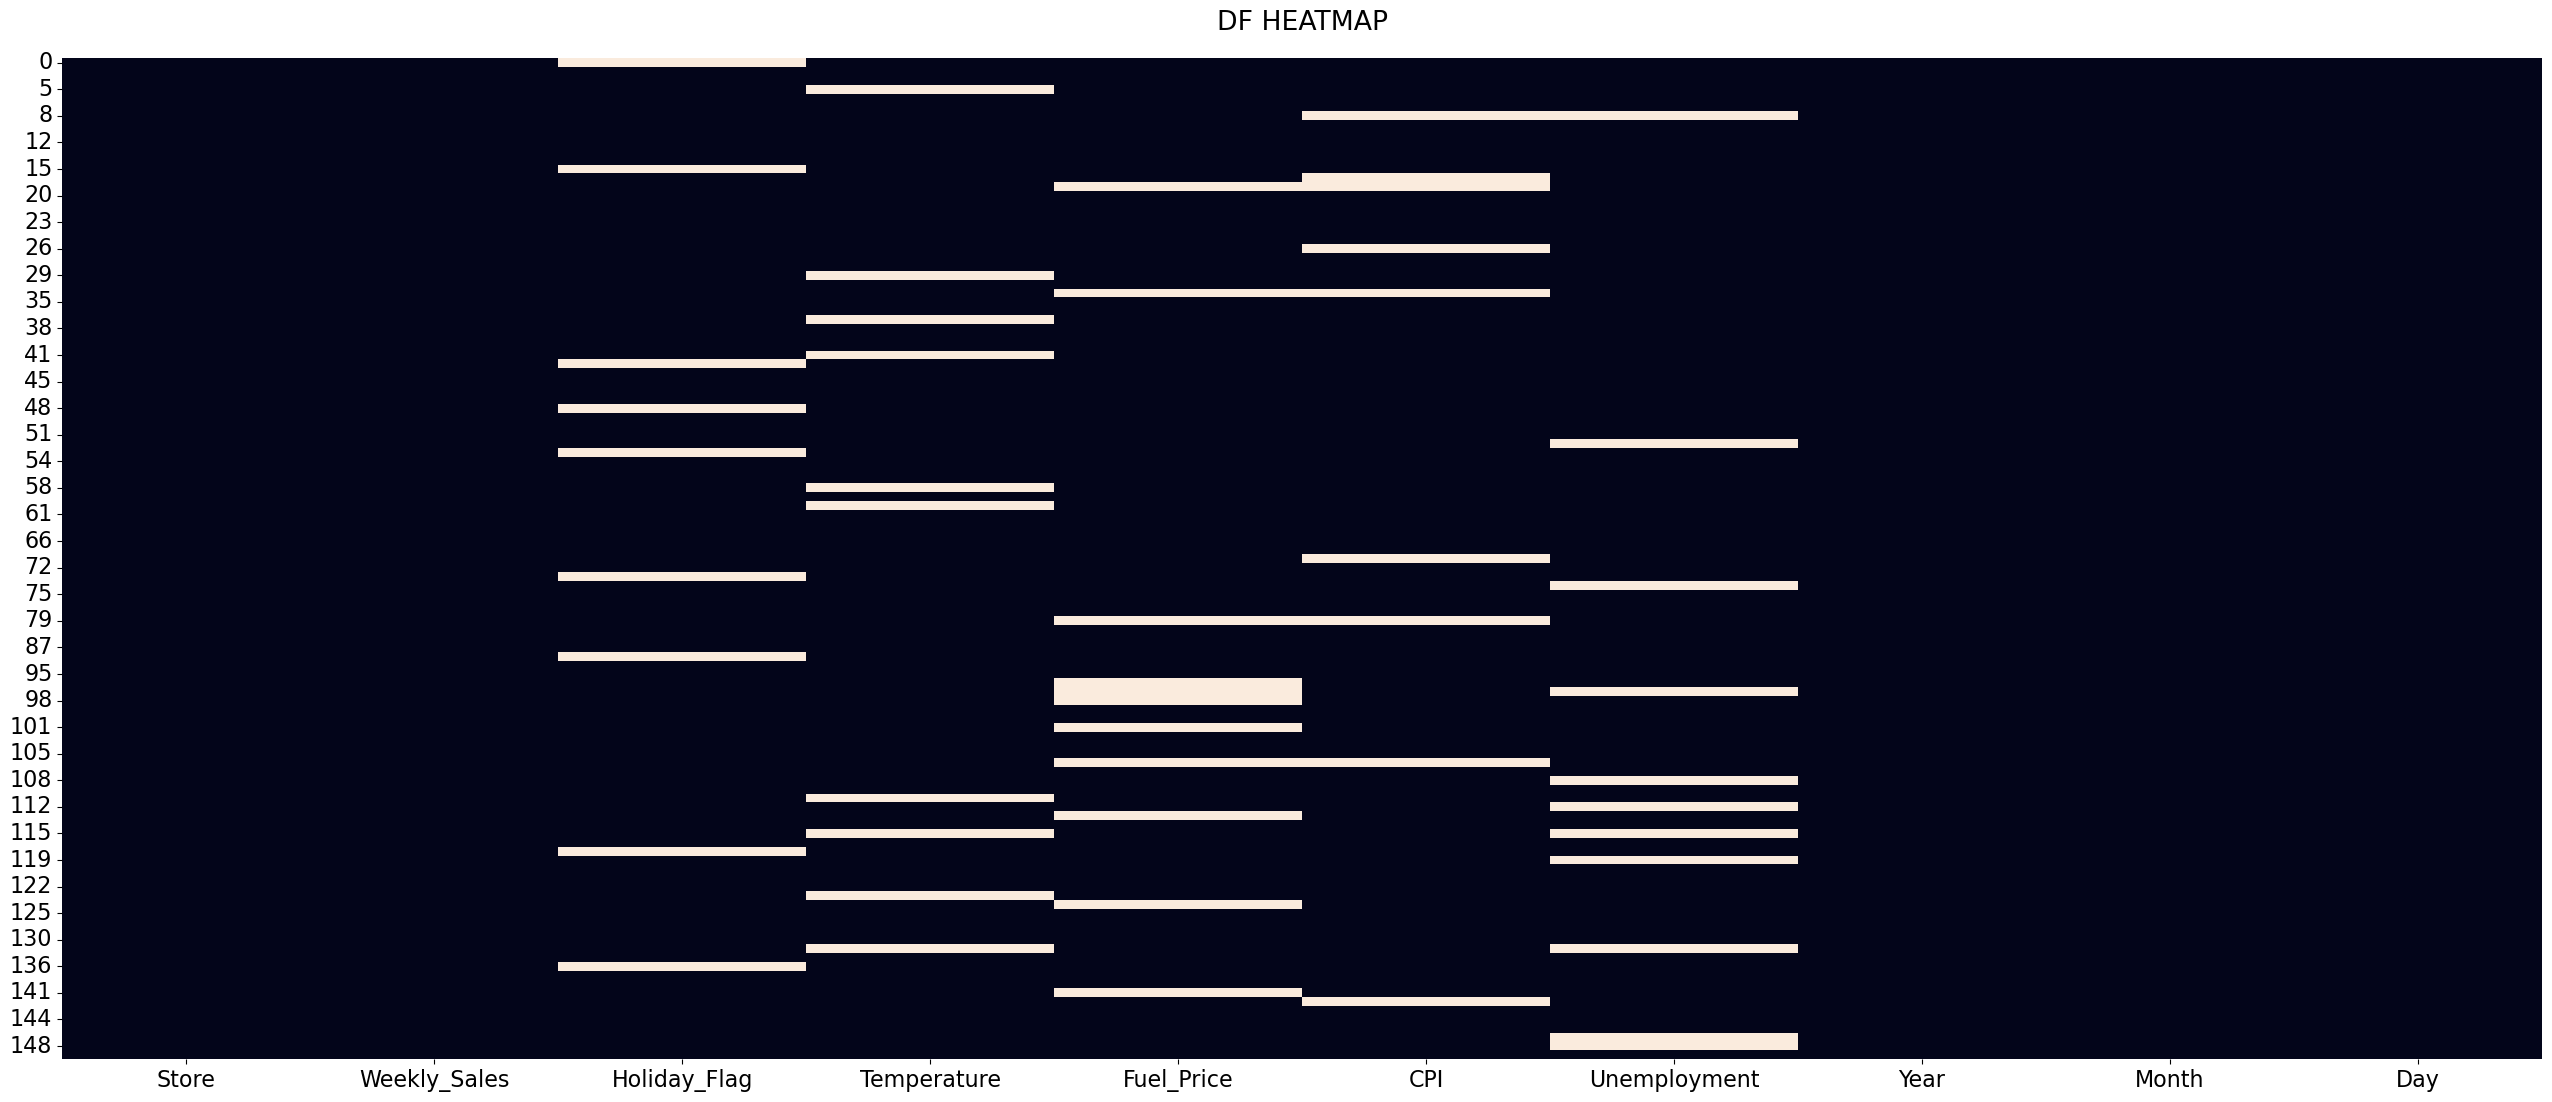

In [682]:
# Creating a figure to have a bigger heatmap
plt.figure(figsize =(32,13))

# Setting up the title
plt.title("DF HEATMAP", y=1.02)

# Creating the heatmap. 
# In black are the rows that contains values. In beige are the rows with missing values.
sns.heatmap(df.isnull(), cbar=False)

__FIGURE INTERPRETATION__<br><br>

* In black are the rows with values and in beige, the rows missing values. We still have 5 columns with missing values: 
    - 'Fuel_Price'
    - 'Unemployment'
    - 'Temperature'
    - 'Holiday_Flag'
    - 'CPI'<br><br>

* The strategy for this EDA and the coming machine learning step is to leave those columns as is.

* We'll deal with the missing values remaining during the preprocessing by replacing with the column mean for instance.

---------
### __3. VISUALIZING OUR FEATURES__
---------

#### __FEATURES DISTRIBUTION__

In [683]:
fig_number = 0

columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for column in columns: 

    fig_number += 1
    fig_number_updated = fig_number

    fig = px.histogram(df, x=df[column], marginal='box')
    
    fig.update_layout(
            height=650,
            title=f'<b>{column.upper()} Distribution</b> - <i>fig.{fig_number_updated}</i>',
            title_font={"size": 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title': column.upper(), 'title_font': {'size': 16}},
            yaxis={'title': 'COUNT', 'title_font': {'size': 16}}
            )

    fig.show()

__FIGURES INTERPRETATION__<br><br>

* We can see that almost all of our features do not follow a normal distribution. 

#### __FEATURES SCATTER IN FUNCTION OF WEEKLY SALES__

In [684]:
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month']

fig_number = 0

for column in columns:

    fig_number += 1
    fig_number_updated = fig_number
    
    fig = px.scatter(df, x=column, y='Weekly_Sales', trendline = 'ols')

    fig.update_layout(
            height=650,
            title = f'<b>{column.upper()} by Weekly Sales</b> - <i>fig.{fig_number_updated}</i>',
            title_font={"size": 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title_font': {'size': 16}},
            yaxis={'title_font': {'size': 16}}, 
        )

    fig.show()

__FIGURES INTERPRETATION__<br><br>

* fig 1. -> It seems that we have a downward trend in weekly sales as a function of temperature: weekly sales seem to decrease as the temperature increases.

* fig 2. -> The price of fuel does not seem to have a great influence on weekly sales although here too, we can see a slight downward trend, but not as pronounced.  

* fig 3. -> The higher the CPI (Consumer Price Index) the lower the weekly sales. Since the CPI is a measure of inflation, when prices rise, the sales goes down which seem to be logical. 

* fig 4. -> A trend that does not seem to be obvious at first glance is the following: as the unemployment rate goes up, so does the weekly sales. 

* fig 5. -> We have about two years of data here, so we can see from year to year the trend in weekly sales, and they seem be stable over the years. 

* fig 6. -> Like the weekly sales by year, we can make the same observation for the weekly sales by month, they seem to be stable over the month. 

#### __FEATURES CORRELATION WITH 'WEEKLY_SALES'__

In [685]:
# The features we want to check the correlation to the target 
features_check_correlation = df[['Day','Unemployment', 'CPI', 'Month', 'Temperature', 'Store', 'Year', 'Holiday_Flag', 'Fuel_Price']]

# The target
target_correleted_to = df['Weekly_Sales']

# Compute the correlation coefficients between the top 20 correlated features and the particular column
corr_coeffs = (features_check_correlation.corrwith(target_correleted_to)).abs().round(2).sort_values(ascending=False)

# Create a dataframe that contains the correlation coefficients
pd.DataFrame(corr_coeffs, columns=['Correlations Coefs'])

C:\Users\zouao\AppData\Local\Temp\ipykernel_1676\1772977515.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Correlations Coefs
CPI,0.36
Temperature,0.19
Unemployment,0.18
Day,0.04
Year,0.04
Fuel_Price,0.02
Month,0.01


C:\Users\zouao\AppData\Local\Temp\ipykernel_1676\2664985247.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

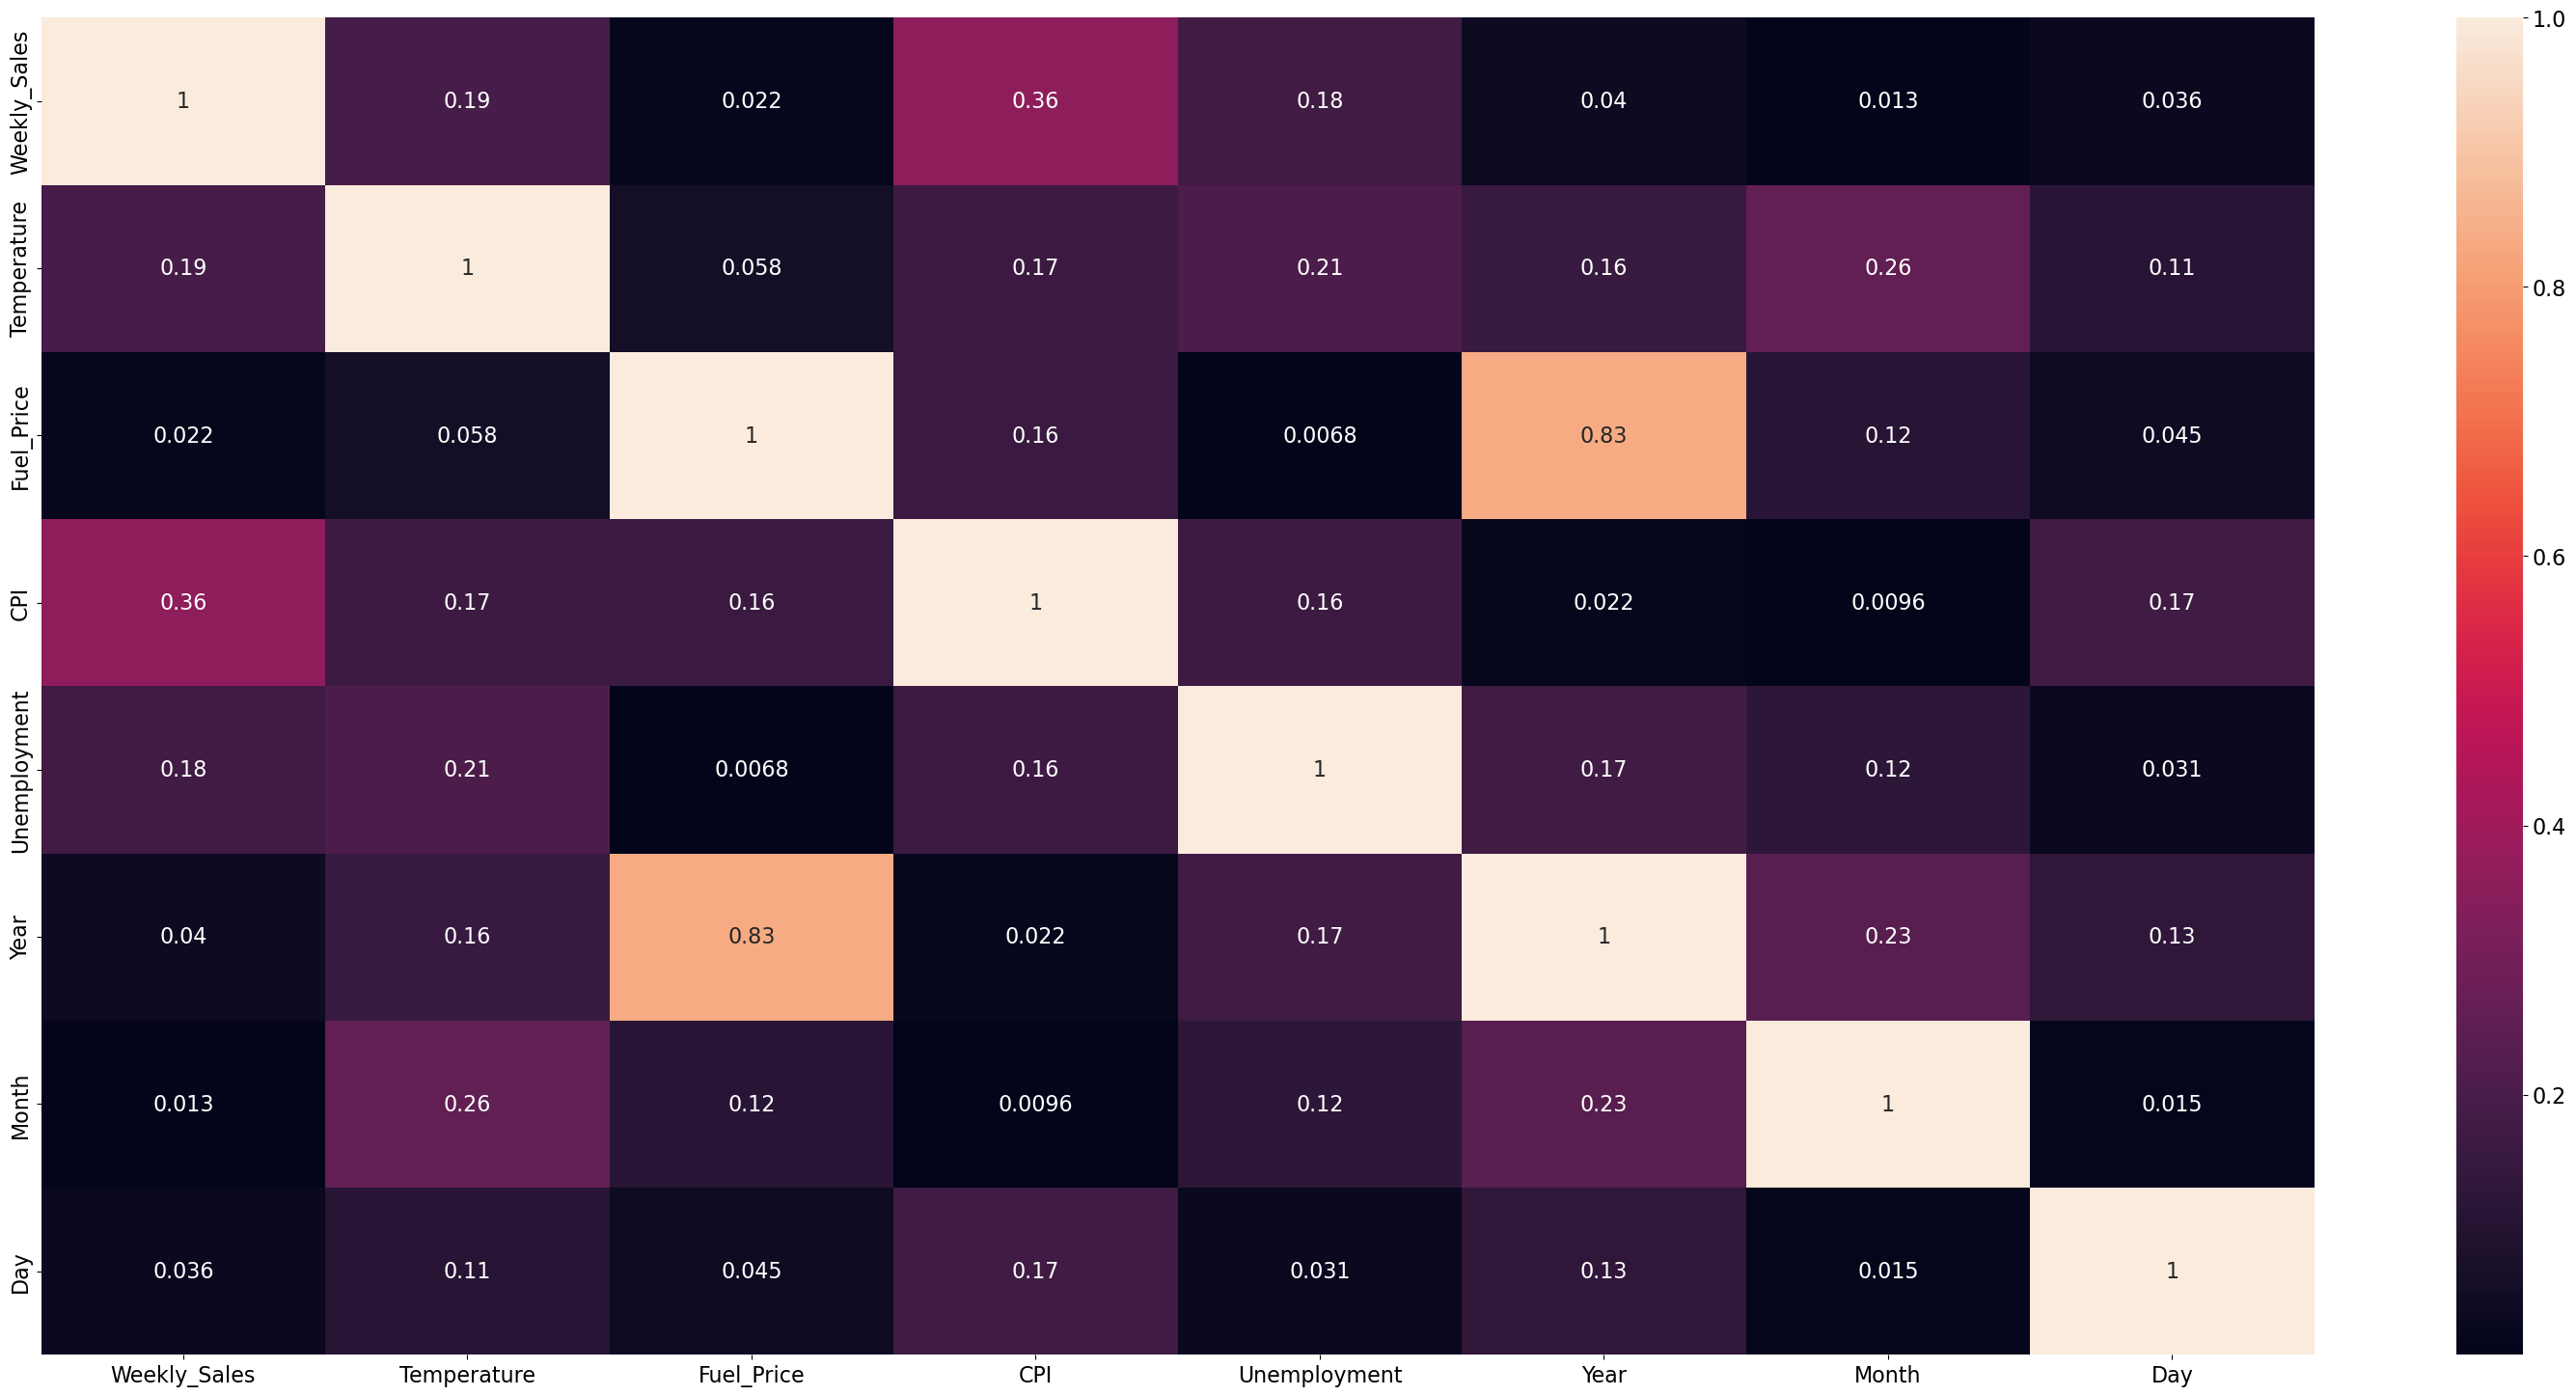

In [686]:
plt.figure(figsize =(38,18))
data_corr=df.corr()
sns.heatmap(abs(data_corr),annot=True)

__FIGURE INTERPRETATION__<br><br>

* It seems that the weekly sales are mostly correlated to the CPI, the temperature and the unemployment rate. 

* Thanks to the heatmap above, we can also mention the features Year and Fuel Price are highly correlated at 0.83

* Month and temperature are also correlated at 0.23.

#### __FOCUS ON STORES PERFORMANCE__

In [687]:
fig = px.bar(df, x='Store', y='Weekly_Sales')

fig.update_layout(
        height=650,
        title= "Stores' Total Sales - From Feb 5, 2010 to Oct 19, 2012",
        title_font={"size": 20},
        xaxis_tickfont_size=14,
        yaxis_tickfont_size=14,
        xaxis={'title_font': {'size': 16}},
        yaxis={'title_font': {'size': 16}}, 
        bargap=0.1
    )

fig.show()

__FIGURE INTERPRETATION__<br><br>

* The top 3 Stores the highest cumulated weekly sales are the store number 14, 13 and 4.

* We can also mention that the store number 12 does not have any sales.

In [688]:
# We are getting the total sales on the period for each stores, their average for instance and also the number of weekly_sales they got.
store_weekly_sales = df.groupby('Store')['Weekly_Sales'].aggregate(['sum', 'mean', 'median', 'min', 'max', 'count']).round(2)
pd.DataFrame(store_weekly_sales)

,sum,mean,median,min,max,count
Store,,,,,,
1.0,12400807.53,1550100.94,1523776.24,1449142.92,1677472.78,8
2.0,11893374.43,1982229.07,1889307.72,1758050.79,2432736.52,6
3.0,4033533.19,403353.32,401090.68,364076.85,461622.22,10
4.0,13042553.90,2173758.98,2051386.62,1857533.70,2771397.17,6
5.0,2060791.26,294398.75,298697.84,268929.03,313358.15,7
6.0,9306741.48,1551123.58,1552213.16,1420405.41,1644470.66,6
7.0,3756650.81,536664.40,561145.14,414094.05,629994.47,7
8.0,5332524.79,888754.13,874576.47,836707.85,994801.40,6
9.0,2027549.60,506887.40,511168.58,485389.15,519823.30,4


We can note that Store 1 has 8 weeks of sales data, Store 3 has 10 for instance and Store 12 has none.


In [689]:
# Getting the 3 largest Weekly_Sales
df[['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']].nlargest(3,'Weekly_Sales')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
64,4.0,2771397.17,0.0,36.44,3.149,129.898065,5.143
8,14.0,2600519.26,0.0,30.54,3.109,NaN,NaN
72,13.0,2461468.35,0.0,36.78,2.817,126.793400,7.795


The results being Store 4, 14 and 13. We can also see the condition in which these results have been achiveved regarding the rate of unemployment, the temperature, etc. 

In [690]:
# We could also ask to get the Weekly Sales for each features in order to know at what point we get the most sales
"""df.groupby('Temperature')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)
df.groupby('Fuel_Price')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)
df.groupby('CPI')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)
df.groupby('Unemployment')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)
"""

"df.groupby('Temperature')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)\ndf.groupby('Fuel_Price')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)\ndf.groupby('CPI')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)\ndf.groupby('Unemployment')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=False)\n"

--------

# <center>__II - DATA PREPROCESSING__</center>

--------

#### __SECTION PLAN__ 🎯

1. SEPARATING THE TARGET VARIBALE FROM FEATURES
2. PREPROCESSING PIPELINES


--------
### __1. SEPARATING THE TARGET VARIBALE FROM FEATURES__
--------

In [691]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

print('>>>> 💔 Separating labels from features...')
Y = df[:]['Weekly_Sales']
X = df.drop(columns= ['Weekly_Sales']) # All columns are kept, except the target
print('--------------------------------')
print ('Target Value (Y): Weekly_Sales')
display(Y.head())
print('--------------------------------')
print ('Features Values (X):')
display(X.head())
print('>>>> ✅ ...Done')


>>>> 💔 Separating labels from features...
--------------------------------
Target Value (Y): Weekly_Sales


0    1572117.54
1    1807545.43
4    1644470.66
5    1857533.70
6     695396.19
Name: Weekly_Sales, dtype: float64

--------------------------------
Features Values (X):


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0
5,4.0,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0
6,15.0,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0


>>>> ✅ ...Done


--------
### __2. PREPROCESSING PIPELINES__
--------

In [692]:
print('>>>> 🟨 Dividing into train and test sets...')

# test_size indicates the proportion of rows from X and Y that will go into the test dataset while 
# maintaining the correspondance between the rows from X and Y 
# random_state is given a value so that the results will be the same everytime the cell runs
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print('>>>> ✅ ...Done')

>>>> 🟨 Dividing into train and test sets...
>>>> ✅ ...Done


In [693]:
print('>>>> 🟨 Creating pipeline for numeric features...')

numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day'] # Names of numeric columns in X_train/X_test

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

print('>>>> ✅ ...Done')

>>>> 🟨 Creating pipeline for numeric features...
>>>> ✅ ...Done


In [694]:
print('>>>> 🟨 Creating pipeline for categorical features...')

categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

print('>>>> ✅ ...Done')

>>>> 🟨 Creating pipeline for categorical features...
>>>> ✅ ...Done


In [695]:
# Using ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [696]:
# Preprocessings on train set
print()
print('>>>> 🟨 Performing preprocessings on train set...')
print()
display(X_train.head())
print()

print('Preprocessings on train set result: ')
X_train = preprocessor.fit_transform(X_train)
display(X_train[0:5]) # must use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
print('>>>> ✅ ...Done')


>>>> 🟨 Performing preprocessings on train set...



,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
52,9.0,0.0,85.02,2.653,214.896576,NaN,2010.0,6.0,25.0
11,18.0,0.0,52.02,2.878,132.763355,9.331,2010.0,10.0,15.0
105,19.0,0.0,72.83,2.932,132.598387,8.099,2010.0,7.0,30.0
110,20.0,1.0,28.85,3.179,204.643227,7.484,2010.0,12.0,31.0
75,20.0,0.0,75.17,2.808,204.567546,7.856,2010.0,6.0,25.0



Preprocessings on train set result: 


array([[ 1.52509498, -1.37012974,  0.95928786,  0.12672055, -1.05558715,
        -0.02760328,  1.01737744,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.41944433, -0.88020148, -1.17615679,  2.07014781, -1.05558715,
         1.2145443 , -0.16105203,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.80679394, -0.7626187 , -1.18044591,  0.72955297, -1.05558715,
         0.28293362,  1.60659218,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       


>>>> ✅ ...Done


In [697]:
# Preprocessings on test set
print()
print('>>>> 🟨 Performing preprocessings on test set...')
print()
display(X_test.head())

print('Preprocessings on test set result: ')
X_test = preprocessor.transform(X_test) 
# We don't fit again. The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all our results.

display(X_test[0:5,:]) # must use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
print('>>>> ✅ ...Done')
print()


>>>> 🟨 Performing preprocessings on test set...



,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
141,5.0,0.0,62.37,NaN,212.560411,6.768,2010.0,11.0,12.0
13,1.0,0.0,64.74,3.734,221.211813,7.348,2012.0,3.0,16.0
29,6.0,0.0,NaN,3.523,217.270654,6.925,2011.0,8.0,26.0
10,8.0,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0
144,3.0,0.0,73.44,3.594,226.968844,6.034,2012.0,10.0,19.0


Preprocessings on test set result: 


array([[ 0.19043391,  0.03215381,  0.89854813, -0.71876824, -1.05558715,
         1.5250812 , -0.51458087,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.33008718,  0.98370336,  1.12348257, -0.08764405,  1.41201918,
        -0.95921397, -0.04320908,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.02779971,  0.52425953,  1.02101335, -0.54792945,  0.17821601,
         0.59347051,  1.13522039,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
       


>>>> ✅ ...Done



--------

# <center>__III - BASELINE MODEL: LINEAR REGRESSION__</center>

--------

#### __SECTION PLAN__ 🎯

1. MODEL TRAINNING AND PREDICTIONS
2. EVALUATING THE MODEL: PERFORMANCE METRICS & COEFFICIENTS


--------
### __1. MODEL TRAINNING AND PREDICTIONS__
--------

In [698]:
# Train model
print('>>>> 🟨 Trainning model...')
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print('>>>> ✅ ...Done')


>>>> 🟨 Trainning model...
>>>> ✅ ...Done


In [699]:
# Predictions on training set
print('>>>> 🟨 Predictions results on training set...')
print()
Y_train_pred = regressor.predict(X_train)
print(Y_train_pred)
print()
print('>>>> ✅ ...Done')

>>>> 🟨 Predictions results on training set...

[ 345453.41734299 1166916.83331935 1402517.44634193 2068151.71407692
 1921354.8585015  1993918.80422721 2164731.92953557 1584915.66688983
  609412.40590646 2419162.41306689 1424763.67477377 2056420.57731472
 1960039.73001308 1986470.70699678 1291857.73040625 1910049.32195797
  583064.27306589 1357151.51196631 1372723.2151276   926990.59281169
 2113760.76135911  351094.2714745  1977360.6047895   377290.46649403
 1653171.71530068 1847766.51384435 2042843.32280853 2065845.52748385
 2071865.16759688  686626.20122392  606972.63525749 1157565.57400604
  377438.3204395   402208.16409353 1539896.46958316 1986890.28742158
 2436208.44389106  444619.04716171 1629855.48261014 1559336.41376164
  507937.44111981  336085.10478546  422313.71639306 1489552.80857663
  760464.79397008  417648.20784499 1993259.25197737 2173040.85508446
 1757242.51        481013.78891684  945026.02256024 1477646.92356706
 2110671.84374898  131934.39574529 1400955.90200804  949

In [700]:
# Predictions on test set
print('>>>> 🟨 Predictions results on test set...')
print()
Y_test_pred = regressor.predict(X_test)
print(Y_test_pred)
print()
print('>>>> ✅ ...Done')

>>>> 🟨 Predictions results on test set...

[ 377852.43059059 1442910.9981167  1614894.14654116  884781.79007114
  493344.53432481 1183135.87235511 1999199.45322043 2326016.61653378
 2026250.78874589 1555619.08013384 1033370.55202618 2043416.07066753
 1122943.29696071  604308.86918627  465363.43339227   61004.14256379
  610158.40748027  163968.32492321 1883613.56738896  486007.38808264
 1929187.52099832  472351.38741341 2064918.10984959]

>>>> ✅ ...Done


--------
### __2. EVALUATING THE MODEL: PERFORMANCE METRICS & COEFFICIENTS__
--------

#### __PERFORMANCE METRICS__

In [701]:
# Print R^2 scores
print('R2 score on training set : ', r2_score(Y_train, Y_train_pred).round(5))
print('R2 score on test set : ', r2_score(Y_test, Y_test_pred).round(5))

R2 score on training set :  0.97196
R2 score on test set :  0.94927


In [702]:
# CV R^2 scores
scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print(f'The cross validated R2 score is: {round(scores.mean(), 5)}')
print(f'The standard deviation is: {round(scores.std(), 5)}')

The cross validated R2 score is: 0.90852
The standard deviation is: 0.03746


__OBSERVATIONS__<br>
* We get great R2 scores! On the training set the score is 0.97196 and on the test set it’s 0.94927.

* This means that our model is able to explain 97% of the variance in the training data and 94% of the variance in the test data.

* Even if we get a great R2 score, can we conclude that our model is able to capture the patterns in the data well ? Does it necessarily guarantee good predictive performance ?

* To answer those questions, let’s check another metric, the MSE.

In [703]:
# Calculate the mean squared error of the model on the train and test sets using scikit-learn's mean_squared_error function
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

# Print the results
print(f'MSE on training set: {train_mse:.2f}')
print(f'MSE on test set: {test_mse:.2f}')

MSE on training set: 12417316000.53
MSE on test set: 24143201452.93


In [704]:
actual_vs_predicted_results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
actual_vs_predicted_results.head()

,Actual,Predicted
141,301827.36,3.778524e+05
13,1677472.78,1.442911e+06
29,1420405.41,1.614894e+06
10,895066.50,8.847818e+05
144,424513.08,4.933445e+05


In [705]:
# we get to compare the actual average of our target 'Weekly_Sales' with the average our model predicted. 
print(f'Actual average of our target Weekly_Sales: {round(Y.mean(), 2)}')
print(f'Predicted average Weekly_Sales: {round(Y_test_pred.mean(), 2)}')

Actual average of our target Weekly_Sales: 1267414.77
Predicted average Weekly_Sales: 1167157.25


In [706]:
print(f'The variance score is: {regressor.score(X_test,Y_test)}')

The variance score is: 0.9492716025800254


__OBSERVATIONS__<br>
* We get quite different MSE for the train and test. 

* Plus, those MSE are pretty high which means that the model is not able to make very accurate predictions on both training and test data despite having great R2 score. 

* This could be the result of different elements such as:
    - our data not being big enough for our model to train sufficiently.
    - our model not being complex enough.<br><br>

* That’s why we should try a model with tailored hyperparameters, with a regularized model like Lasso or Ridge that might get us better performance. 

#### __COEFFICIENTS__

In [710]:
feature_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())

coefs = pd.DataFrame(
   regressor.coef_,
   columns=['Coefficients'], index=feature_names
)

coefs['Coefficients'] = abs(coefs['Coefficients'])
coefs.sort_values(by=['Coefficients'], inplace=True, ascending=True)

coefs

,Coefficients
Year,4.525908e+02
CPI,3.114504e+04
Store_6.0,3.312633e+04
Temperature,3.462586e+04
Day,3.826855e+04
Fuel_Price,4.202860e+04
Holiday_Flag_1.0,5.800211e+04
Unemployment,7.109848e+04
Month,7.652441e+04
Store_19.0,1.417394e+05


In [711]:
fig = go.Figure(
    data=[
        go.Bar(
            x= coefs['Coefficients'],
            y= coefs.index,
            orientation='h'
            )])

fig.update_layout(
    height = len(coefs)*30,
    title='Features Importance',
    xaxis_title='Coefficients', 
    yaxis_title='Features')

fig.show()

__OBSERVATIONS__<br>
* The highest coefficients are linked to the stores themselfs. Meaning that the weekly sales amounts are highly related to the store they are made at.<br><br>
* As for the other features, the ones with the highest coeficient are the Month followed by the Unemployement rate. 
    

--------

# <center>__IV - REGULARIZED LINEAR REGRESSION MODEL: RIDGE__</center>

--------

#### __SECTION PLAN__ 🎯

1. CROSS-VALIDATED SCORE FOR A RIDGE MODEL (with default value of λλ)
2. GRID SEARCH: TUNNING λλ  AND NUMBER OF FOLDS
3. EVALUATING THE MODEL: PERFORMANCE METRICS

--------
### __1. CROSS-VALIDATED SCORE FOR A RIDGE MODEL (with default value of λλ)__
--------

In [712]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)

print('The cross-validated R2-score is: ', scores.mean().round(5))
print('The standard deviation is: ', scores.std().round(5))


3-fold cross-validation...
The cross-validated R2-score is:  0.78722
The standard deviation is:  0.03541


--------
### __2. GRID SEARCH: TUNNING λλ  AND NUMBER OF FOLDS__
--------

In [713]:
# Perform grid search
print('>>>> 🟨 Grid search...')
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_.round(5))
print('>>>> ✅ ...Done')


>>>> 🟨 Grid search...
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.91058
>>>> ✅ ...Done


--------
### __3. EVALUATING THE MODEL: PERFORMANCE METRICS__
--------

In [714]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train).round(5))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test).round(5))
print('-----------------------------------')
#Calculate MSE on training set
predictions_train = gridsearch.predict(X_train)
mse_train = mean_squared_error(Y_train, predictions_train)

# Calculate MSE on test set
predictions_test = gridsearch.predict(X_test)
mse_test = mean_squared_error(Y_test, predictions_test)

print("MSE on training set: ", mse_train)
print("MSE on test set: ", mse_test)

R2 score on training set :  0.97034
R2 score on test set :  0.95789
-----------------------------------
MSE on training set:  13135488694.074413
MSE on test set:  20040539517.558475


--------

# <center>__V - REGULARIZED LINEAR REGRESSION MODEL: LASSO__</center>
<center><i>Least Absolute Shrinkage and Selection Operator</i></center>

--------

#### __SECTION PLAN__ 🎯

1. CROSS-VALIDATED SCORE FOR A LASSO MODEL (with default value of λλ)
2. GRID SEARCH: TUNNING λλ  AND NUMBER OF FOLDS
3. EVALUATING THE MODEL: PERFORMANCE METRICS

--------
### __1. CROSS-VALIDATED SCORE FOR A LASSO MODEL (with default value of λλ)__
--------

In [715]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Lasso()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)

print('The cross-validated R2-score is: ', scores.mean().round(5))
print('The standard deviation is: ', scores.std().round(5))


3-fold cross-validation...
The cross-validated R2-score is:  0.90363
The standard deviation is:  0.03259


c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+10, tolerance: 2.318e+09

c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+11, tolerance: 2.796e+09



--------
### __2. GRID SEARCH: TUNNING λλ AND NUMBER OF FOLDS__
--------

In [716]:
# Perform grid search
print('>>>> 🟨 Grid search...')
regressor = Lasso()

# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_.round(5))
print('--------------------------------------------------------------')
print('The cross-validated R2-score is: ', scores.mean().round(5))
print('The standard deviation is: ', scores.std().round(5))
print('>>>> ✅ ...Done')

>>>> 🟨 Grid search...


c:\Users\zouao\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.240e+11, tolerance: 3.300e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

c:\Users\zouao\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarn

Best hyperparameters :  {'alpha': 1}
Best R2 score :  0.90855
--------------------------------------------------------------
The cross-validated R2-score is:  0.90363
The standard deviation is:  0.03259
>>>> ✅ ...Done


c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.982e+10, tolerance: 2.798e+09

c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.057e+10, tolerance: 3.311e+09

c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.988e+10, tolerance: 2.798e+09

c:\Users\zouao\anaconda3\lib\site-packages\sklearn\linear_model\_co

--------
### __3. EVALUATING THE MODEL: PERFORMANCE METRICS__
--------

In [717]:
print('-----------------------------------')
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train).round(5))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test).round(5))
print('-----------------------------------')
#Calculate MSE on training set
predictions_train = gridsearch.predict(X_train)
mse_train = mean_squared_error(Y_train, predictions_train)

# Calculate MSE on test set
predictions_test = gridsearch.predict(X_test)
mse_test = mean_squared_error(Y_test, predictions_test)

print("MSE on training set: ", mse_train)
print("MSE on test set: ", mse_test)

-----------------------------------
R2 score on training set :  0.97196
R2 score on test set :  0.94929
-----------------------------------
MSE on training set:  12417316861.563192
MSE on test set:  24132965876.044228


# <center>__BONUS QUESTION__</center>

Using the examples from the following link provided by JEDHA Bootcamp: https://alfurka.github.io/2018-11-18-grid-search/

In [718]:
def test(models, data, iterations = 100):

    results = {}

    for i in models:
        r2_train = []
        r2_test = []

        for j in range(iterations):
                                                                
            r2_test.append(metrics.r2_score(Y_test, models[i].fit(X_train, Y_train).predict(X_test)))

            r2_train.append(metrics.r2_score(Y_train, models[i].fit(X_train, Y_train).predict(X_train)))

        results[i] = [np.mean(r2_train), np.mean(r2_test)]

    return pd.DataFrame(results)

models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge()}

test(models, df)


,OLS,Lasso,Ridge
0,0.971961,0.971961,0.927494
1,0.949272,0.949293,0.914742


__OBSERVATIONS__<br>
* All models are very close.

* We can note that at this step, Ridge is the lowest performing model with lower score in tranning and testing.
    

In [719]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

target_name = 'Weekly_Sales'
Y = df[:][target_name]
X = df.drop(columns= [target_name])
X = preprocessor.fit_transform(X) 

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(X, Y).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), param_grid=ridge_params).fit(X, Y).best_estimator_,}

test(models2, df)

,OLS,Lasso,Ridge
0,0.971961,0.971961,0.108515
1,0.949272,0.949272,0.113056


__OBSERVATIONS__<br>
* Here, as we tuned the hyperparameters for lasso and ridge with the value taken from the example, we can see that Ridge under perform in ever step, tranning and testing. 

In [720]:
lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'fit__alpha':[550, 580, 600, 620, 650]}

target_name = 'Weekly_Sales'
Y = df[:][target_name]
X = df.drop(columns= [target_name])
X = preprocessor.fit_transform(X) 

pipe1 = Pipeline([('poly', PolynomialFeatures()), ('fit', linear_model.LinearRegression())])

pipe2 = Pipeline([('poly', PolynomialFeatures()), ('fit', linear_model.Lasso())])

pipe3 = Pipeline([('poly', PolynomialFeatures()), ('fit', linear_model.Ridge())])

models3 = {'OLS': pipe1,
           'Lasso': GridSearchCV(pipe2, param_grid=lasso_params).fit(X, Y).best_estimator_ ,
           'Ridge': GridSearchCV(pipe3, param_grid=ridge_params).fit(X, Y).best_estimator_}

test(models3, df)

,OLS,Lasso,Ridge
0,1.000000,1.000000,0.227034
1,0.734537,0.711646,0.179888


__OBSERVATIONS__<br>
* Same observation here as Ridge is still the under performnig model. 
* We can note that we get a perfect score with the baseline model and the lasso regularization. However the score being substantially higher in the tranning than the testing, we are overfitting.

---------
# __CONCLUSION__

* __BASELINE MODEL: LINEAR REGRESSION__
    - R2 score on training set :  0.97196
    - R2 score on test set :  0.94927<br><br>

* __REGULARIZED LINEAR REGRESSION MODEL: RIDGE__
    - With default values:
        - The cross-validated R2-score is:  0.78722<br><br>
        
    - With tuned hyperparameters:
        - R2 score on training set :  0.97034
        - R2 score on test set :  0.95789<br><br>

* __REGULARIZED LINEAR REGRESSION MODEL: LASSO__
    - With default values:
        - The cross-validated R2-score is:  0.90363<br><br>
            
    - With tuned hyperparameters:
        - R2 score on training set :  0.97196
        - R2 score on test set :  0.94929<br><br>

* Overall, my models seem to be performing better than the ones used in the bonus question, espacially the Ridge. 

* Here, it is the overall best model with the highest R2 score in in the test set with closer score to it training test than other models. Having said that, we should keep in mind the small data set we got to train and test our models as well as the idea that the R2 is not a guarantee to have a great performing model by itself. 
<br><br>

---------

__`NOTEBOOK END`__